# **Predictive Analytics: Medical Insurance Premium Prediction**

# **1. Import/Install Library yang Dibutuhkan**

In [1]:
!pip install -q gdown

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
%matplotlib inline

# **2. Data Understanding**

# Data Collection

In [7]:
!gdown --id "1583goh5FQOTclA1U3SoVVO9hvnp5miZY"

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1583goh5FQOTclA1U3SoVVO9hvnp5miZY
To: /content/submissiondataset.zip
100% 7.25k/7.25k [00:00<00:00, 31.3MB/s]


In [4]:
from google.colab import files
#Upload Kaggle API Key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adhimkhairilanam","key":"059aa9f9b7172d087c7107287c7236b3"}'}

# **Exploratory Data Analysis (EDA)**

In [10]:
df = pd.read_csv("/content/submissiondataset.zip")
df.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


# Data Understanding & Removing Outlier


In [14]:
df.shape

(986, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [16]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom
- Max adalah nilai maksimum

# Handling Missing Value


In [19]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


Kolom yang digunakan untuk modeling tidak memiliki missing values, sehingga tidak diperlukan imputasi

In [20]:
df.isnull().sum().sum()

np.int64(0)

In [21]:
df.shape

(986, 11)

Jumlah Datasets setalah penanganan Missing Value dan Outlier: 986, 11

# Handling Outliers


In [22]:
# Hitung IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Deteksi outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Jumlah data outlier pada kolom Age: {len(outliers)}")

# Handling: Buang outliers (opsional: kamu bisa juga imputasi)
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Batas bawah: -4.5, Batas atas: 87.5
Jumlah data outlier pada kolom Age: 0


**Frekuensi Umur**

<Axes: xlabel='Age'>

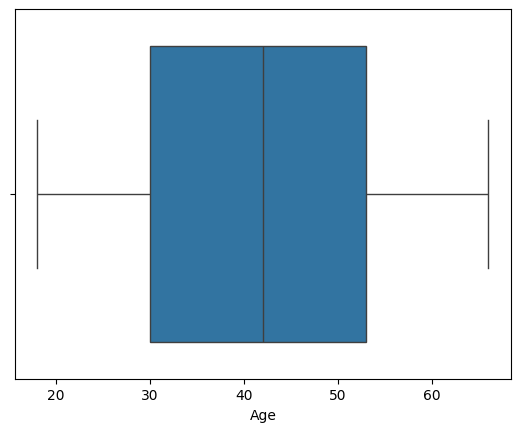

In [23]:
sns.boxplot(x=df['Age'])

****Frekuensi Tinggi Badan****

<Axes: xlabel='Height'>

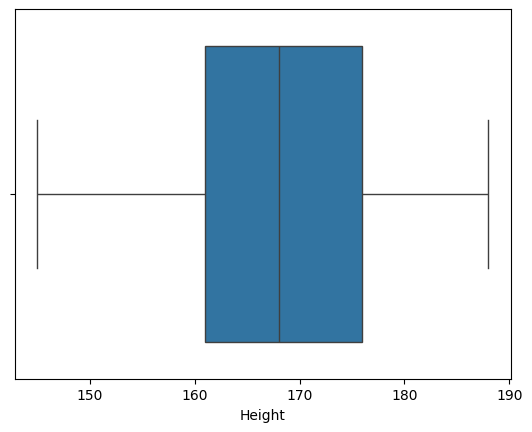

In [24]:
sns.boxplot(x=df['Height'])

**Frekuensi Berat Badan**

<Axes: xlabel='Weight'>

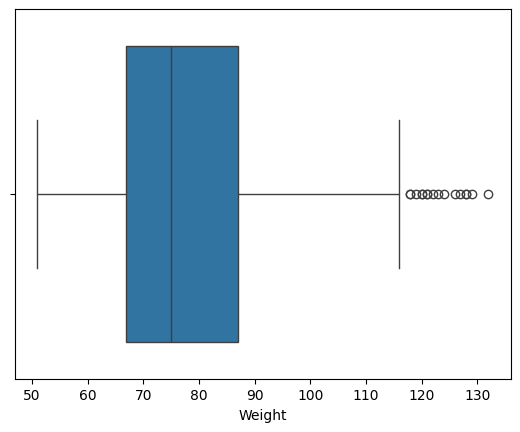

In [25]:
sns.boxplot(x=df['Weight'])

**Frekuensi Jumlah Operasi Besar**

<Axes: xlabel='NumberOfMajorSurgeries'>

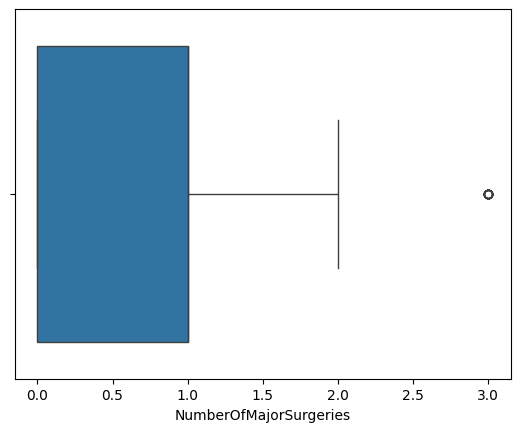

In [26]:
sns.boxplot(x=df['NumberOfMajorSurgeries'])

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
insurance=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
insurance.shape

(518, 11)

Jumlah Datasets setalah kita drop Outlier: 518, 11

**EDA - Univariate Analysis**

Univariate analysis dilakukan untuk memahami distribusi masing-masing fitur:

In [28]:
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
num_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

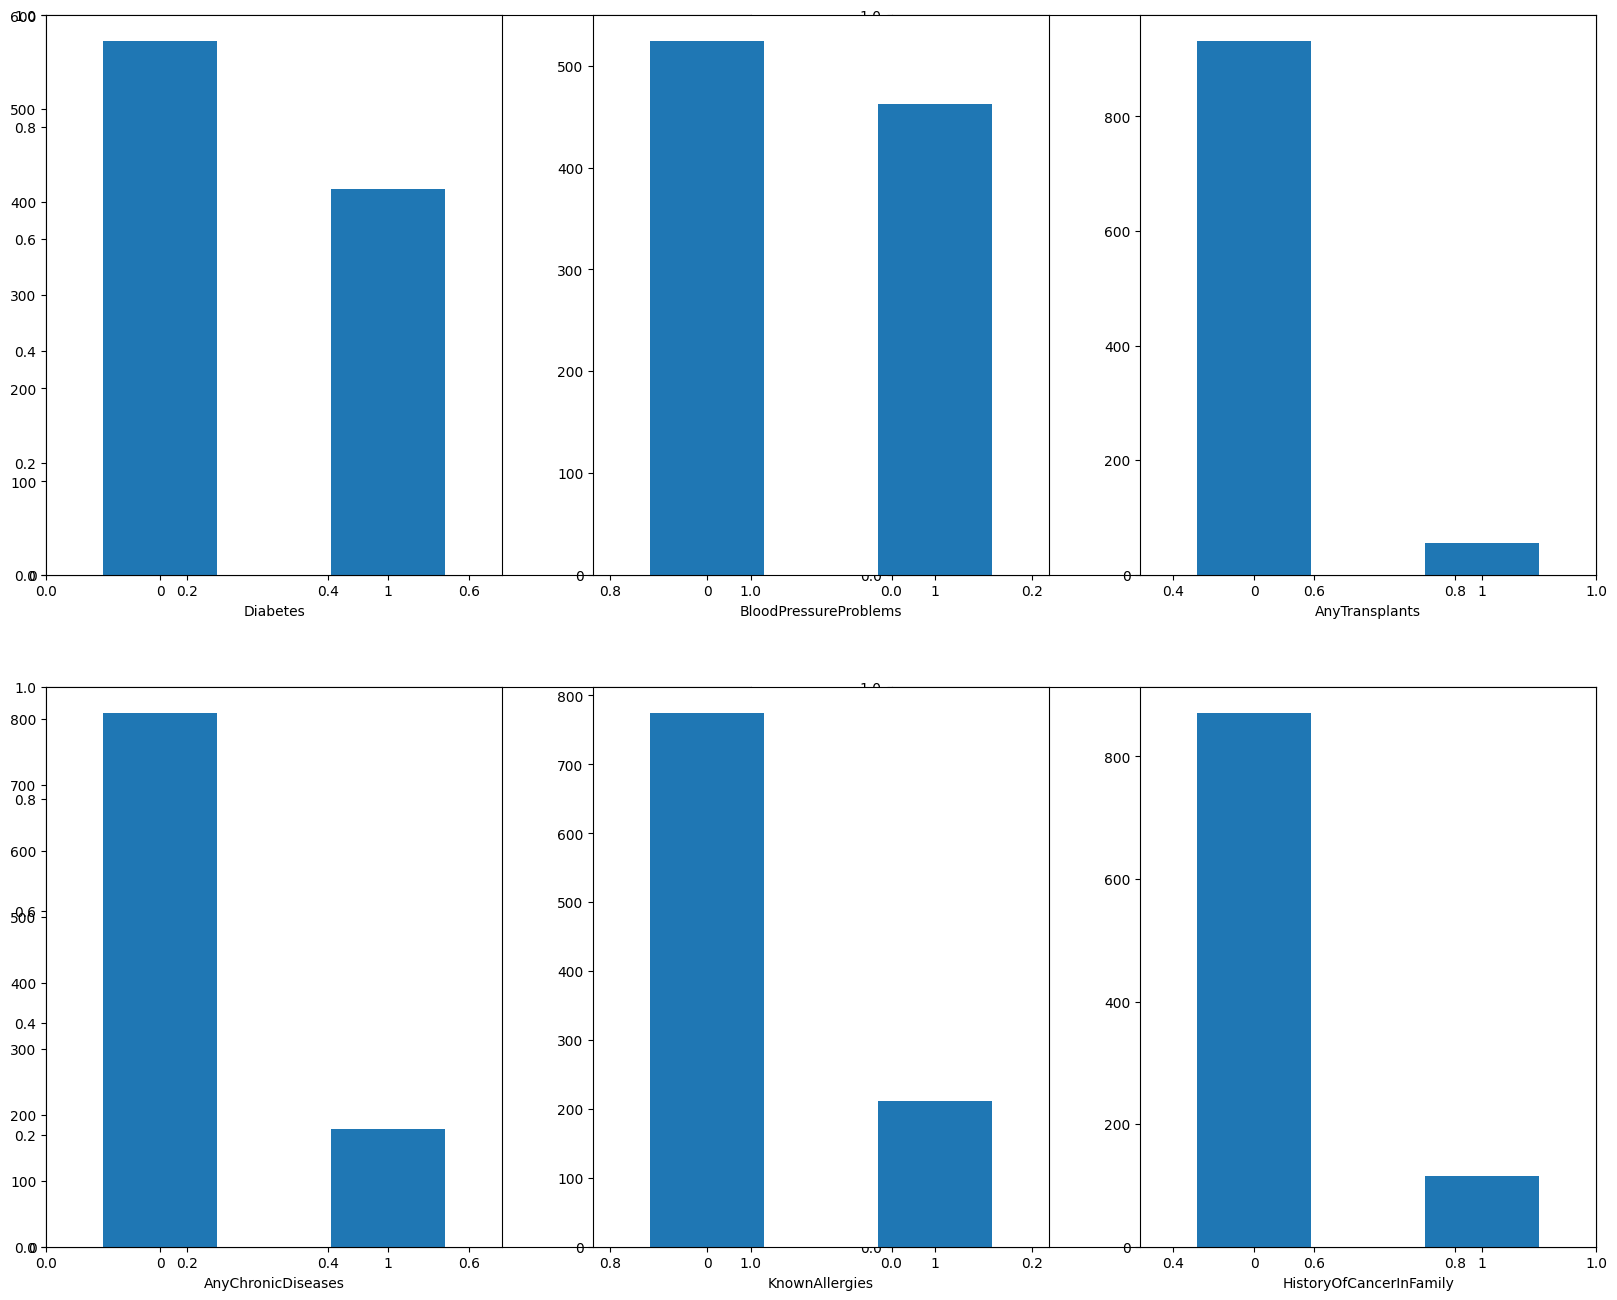

In [29]:
plt.subplots(2, 2, figsize=(20, 16))

for i, col in enumerate(cat_features):
  plt.subplot(2, 3, i + 1)
  df.groupby(col).size().plot(kind='bar', rot=0)

          jumlah sampel  persentase
Diabetes                           
0                   572        58.0
1                   414        42.0


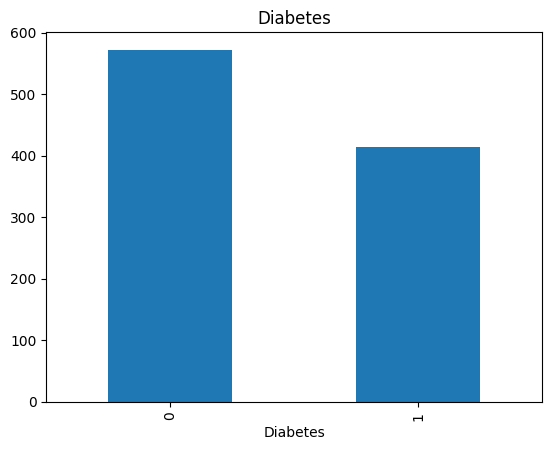

In [30]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature);

                       jumlah sampel  persentase
BloodPressureProblems                           
0                                524        53.1
1                                462        46.9


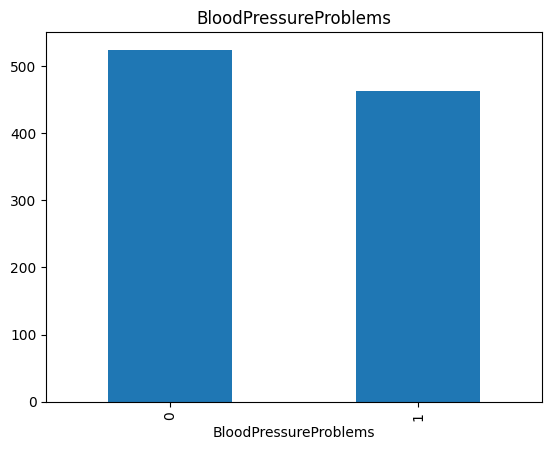

In [31]:
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
AnyTransplants                           
0                         931        94.4
1                          55         5.6


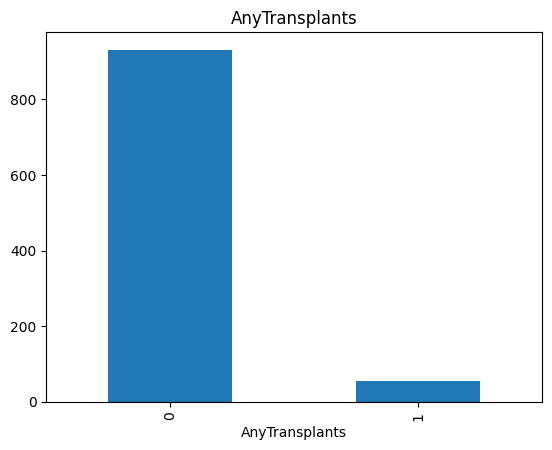

In [32]:
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

                    jumlah sampel  persentase
AnyChronicDiseases                           
0                             808        81.9
1                             178        18.1


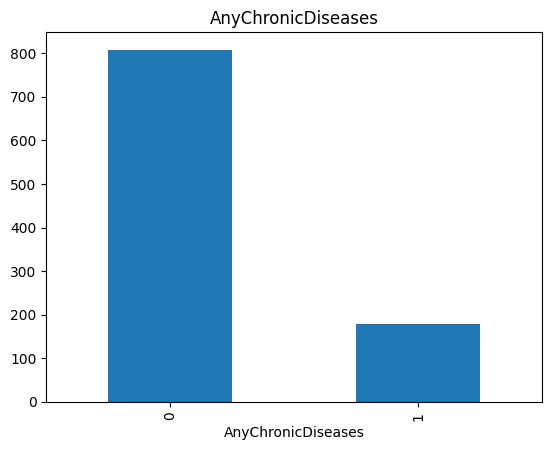

In [33]:
feature = cat_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df3)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
KnownAllergies                           
0                         774        78.5
1                         212        21.5


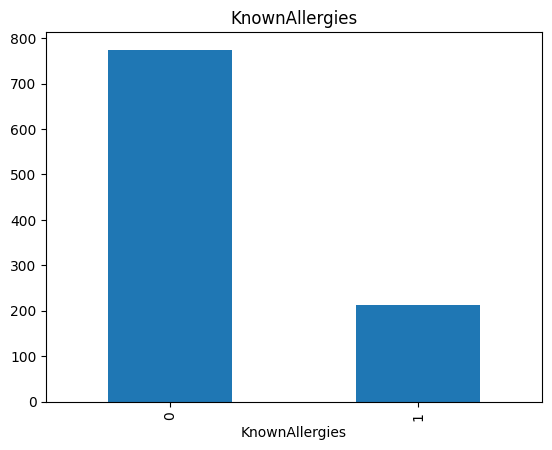

In [34]:
feature = cat_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df4 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df4)
count.plot(kind='bar', title=feature);

                         jumlah sampel  persentase
HistoryOfCancerInFamily                           
0                                  870        88.2
1                                  116        11.8


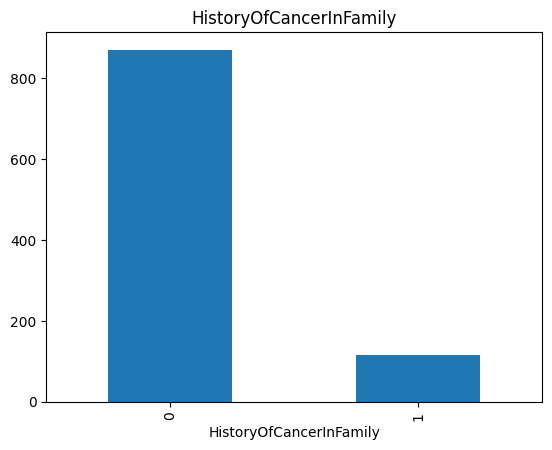

In [36]:
feature = cat_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df5 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df5)
count.plot(kind='bar', title=feature);

**Numerical Features**

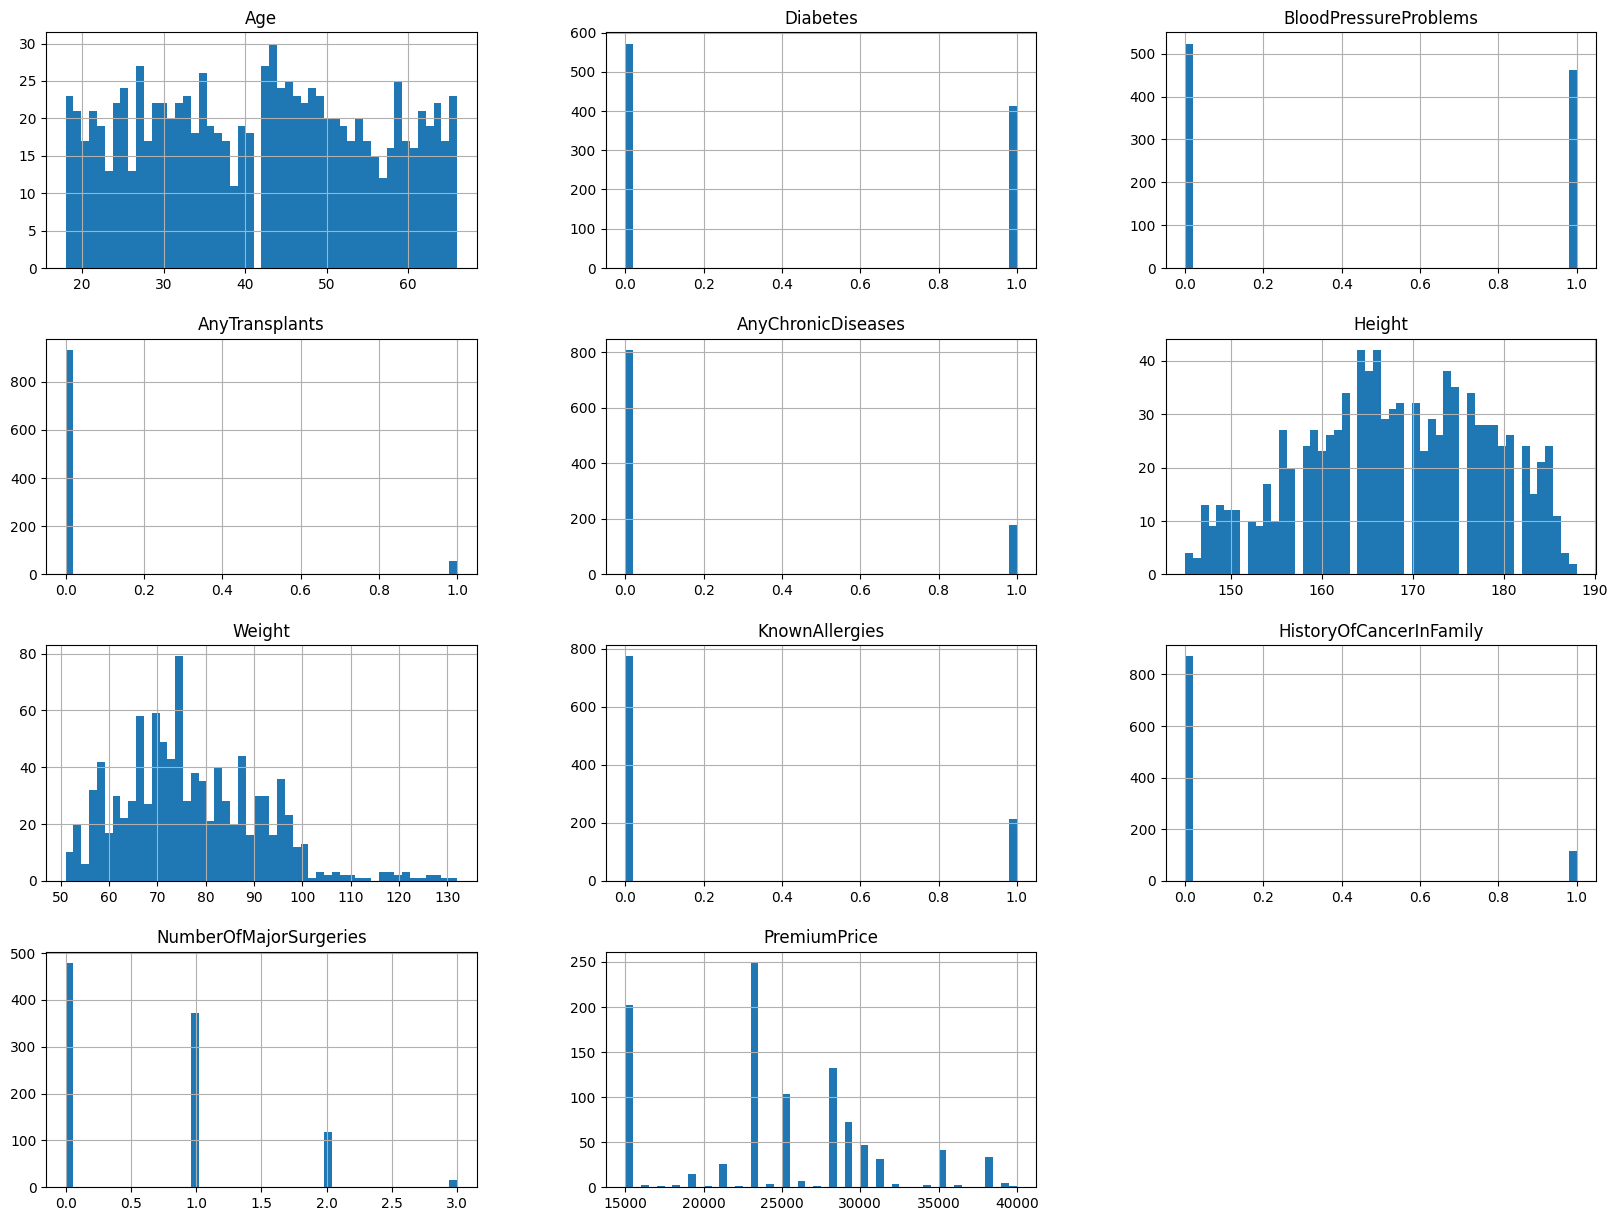

In [37]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**2.2.4 EDA - Multivariate Analysis**

**Categorical Features**

In [38]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="PremiumPrice", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'PremiumPrice' Relatif terhadap - {}".format(col))

**Numerical Features**

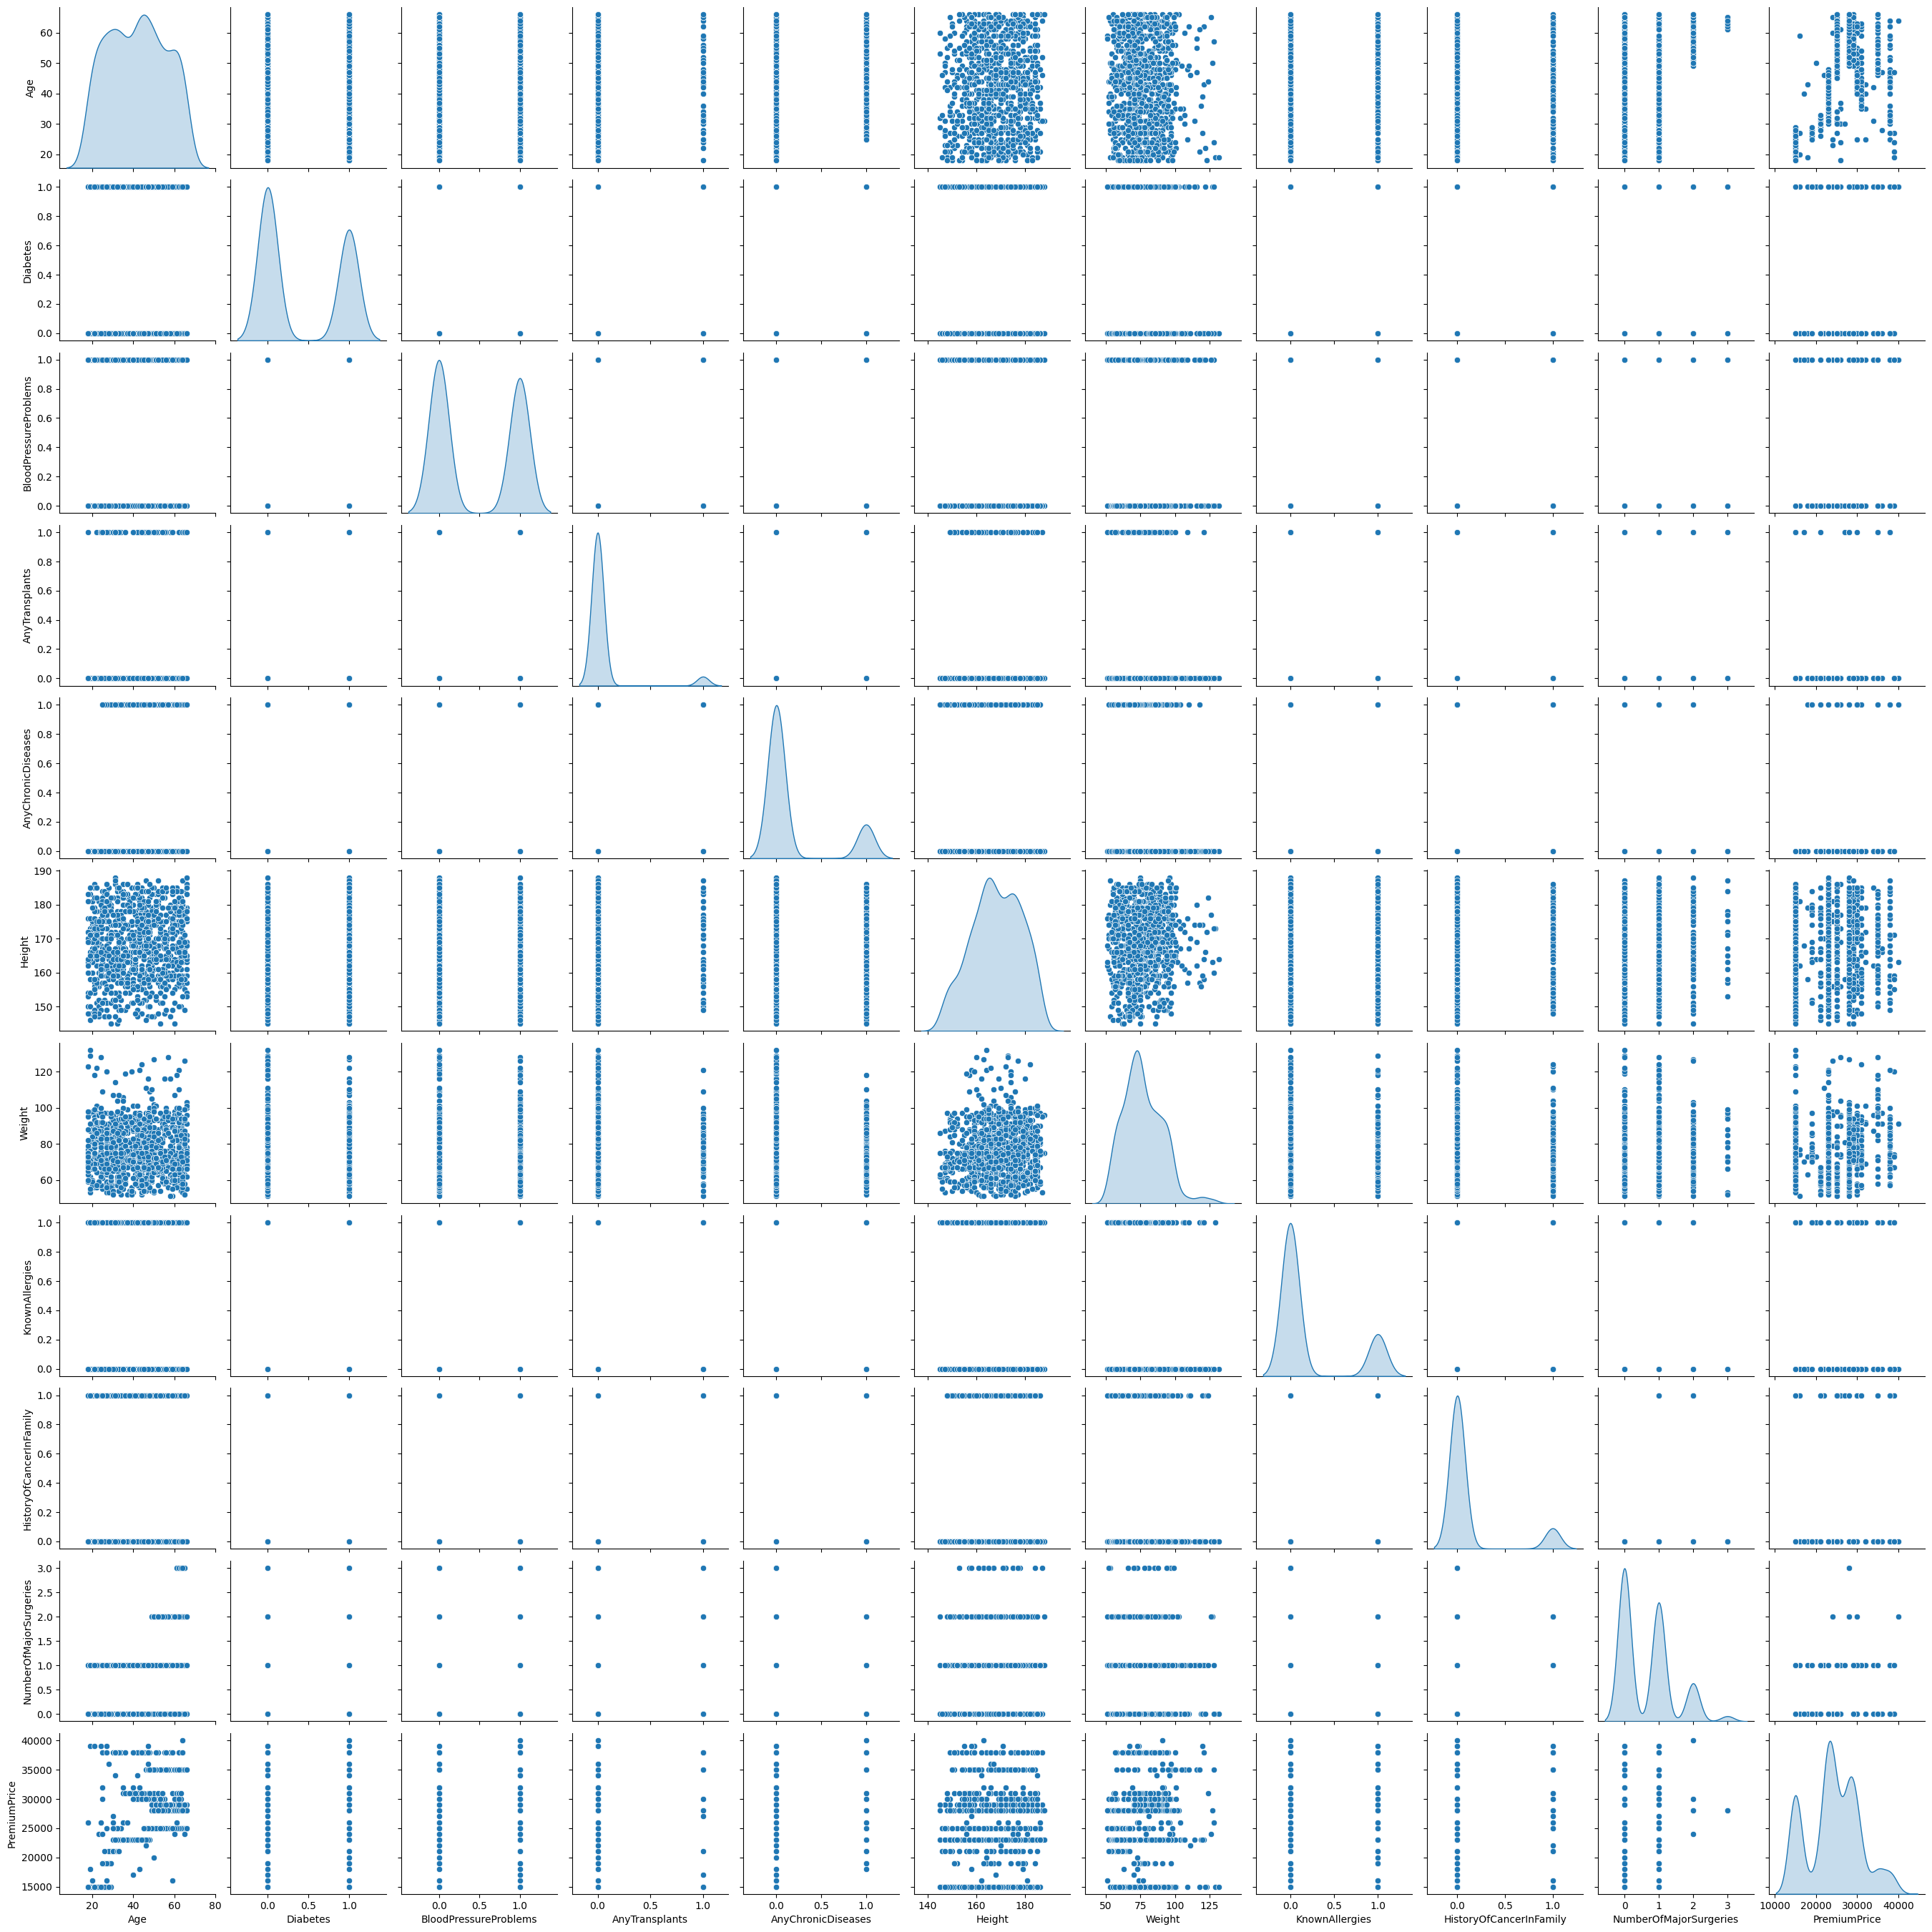

In [39]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

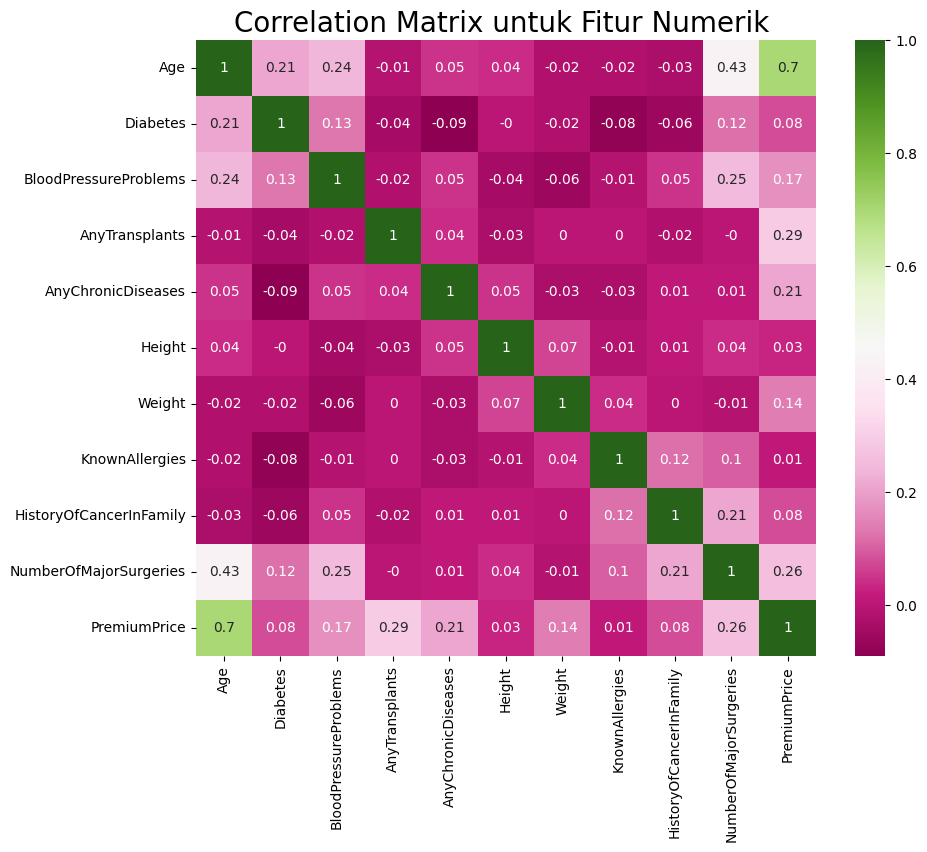

In [40]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='PiYG' )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

**Insight :** Fitur Age adalah prediktor paling dominan untuk PremiumPrice, diikuti oleh faktor medis seperti AnyTransplants, NumberOfMajorSurgeries, dan AnyChronicDiseases. Fitur seperti Height, Weight, dan KnownAllergies memiliki pengaruh yang sangat kecil dan bisa dipertimbangkan untuk dieliminasi pada tahap seleksi fitur, tergantung kebutuhan model.

# Data Preparation

In [41]:
#One Hot Encoding
data_cat =  pd.get_dummies(df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']])

In [42]:
# Concenate Dataframe
df = pd.concat([df,data_cat],axis=1)

In [43]:
df.drop(columns=['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'],inplace=True)

In [44]:
# Split Dataset
from sklearn.model_selection import train_test_split

X = df.drop(['PremiumPrice'],axis =1)
y = df['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [45]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 986
Total # of sample in train dataset: 788
Total # of sample in test dataset: 198


In [46]:
print(f'Total # of sample in whole dataset: {len(y)}')
print(f'Total # of sample in train dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 986
Total # of sample in train dataset: 788
Total # of sample in test dataset: 198


# Model Development

In [47]:
# Dataframe untuk menyimpan hasil
result = pd.DataFrame(index=['train_mse', 'test_mse','eval_train','eval_test'],
                      columns=['Huber', 'SVR'])

In [48]:
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [49]:
# Train Model Huber
hr = HuberRegressor()
hr.fit(X_train, y_train)

result.loc['train_mse','Huber'] = mean_squared_error(y_pred = hr.predict(X_train), y_true=y_train)

In [50]:
# Train Model SVR
svr = SVR()
svr.fit(X_train, y_train)

result.loc['train_mse','SVR'] = mean_squared_error(y_pred = svr.predict(X_train), y_true=y_train)

In [51]:
# Prediksi data testing dan simpan hasil ke dataframe
result.loc['test_mse','Huber'] = mean_squared_error(y_pred = hr.predict(X_test), y_true=y_test)
result.loc['test_mse','SVR'] = mean_squared_error(y_pred = svr.predict(X_test), y_true=y_test)

In [52]:
result

,Huber,SVR
train_mse,18480694.567827,40114366.684487
test_mse,25177990.874646,42742505.675315
eval_train,NaN,NaN
eval_test,NaN,NaN


# Model Evaluation

<Axes: >

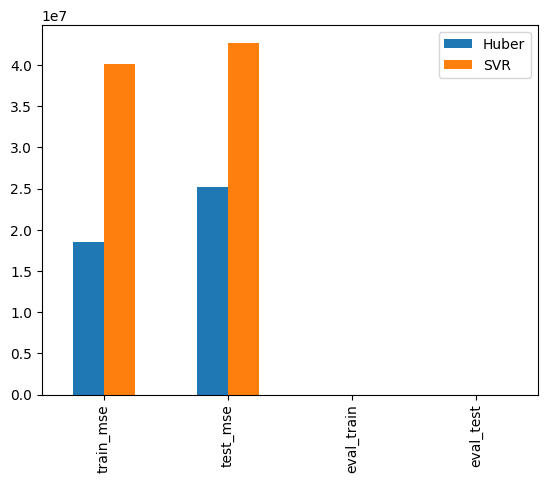

In [53]:
result.plot(kind='bar')

In [54]:
from sklearn.model_selection import GridSearchCV

# Hyperparams Menggunakan Grid Search pada Huber
hr_eval = HuberRegressor()
param_grid = { #Setup Params
    'epsilon': [1.0, 1.5, 2.0],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300]
}

grid_search_huber = GridSearchCV(hr_eval, param_grid, scoring='neg_mean_squared_error', cv=5)

In [55]:
# Train Model dengan hyperparam
grid_search_huber.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_huber.best_params_)
print("Best Score:", grid_search_huber.best_score_)

Best hyperparameters: {'alpha': 0.01, 'epsilon': 2.0, 'max_iter': 100}
Best Score: -18344044.752948012


In [56]:
# Data Testing
result.loc['eval_train','Huber'] = mean_squared_error(y_pred = grid_search_huber.predict(X_train), y_true=y_train)
result.loc['eval_test','Huber'] = mean_squared_error(y_pred = grid_search_huber.predict(X_test), y_true=y_test)

In [57]:
# Hyperparams Menggunakan Grid Search pada SVR
svr_eval = SVR()
param_grid_svr = { #Setup Params
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3]
}
# Train models menggunakan hyperparams
grid_search_svr = GridSearchCV(svr_eval, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_svr.best_params_)
print("Best Score:", grid_search_svr.best_score_)

Best hyperparameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Best Score: -18763048.7300375


In [58]:
# Data Testing
result.loc['eval_train','SVR'] = mean_squared_error(y_pred = grid_search_svr.predict(X_train), y_true=y_train)
result.loc['eval_test','SVR'] = mean_squared_error(y_pred = grid_search_svr.predict(X_test), y_true=y_test)

In [59]:
result

,Huber,SVR
train_mse,18480694.567827,40114366.684487
test_mse,25177990.874646,42742505.675315
eval_train,18104561.095018,18614533.696279
eval_test,24212812.864765,25605704.542962


<Axes: >

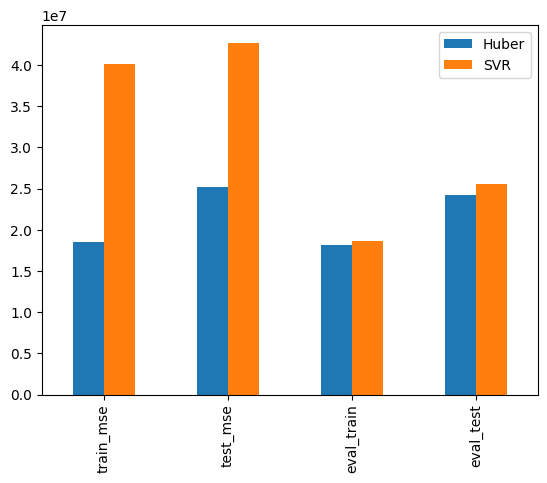

In [60]:
result.plot(kind='bar')

**Insight dari Evaluasi Model Prediksi**
1. Model dengan Performa Terbaik:
  - Huber Regressor

  - Train MSE: Lebih rendah dari SVR menunjukkan bahwa Huber lebih baik dalam menyesuaikan data pelatihan.

  - Test MSE: Secara signifikan lebih rendah dari SVR menunjukkan generalisasi yang lebih baik ke data uji.

  - Eval_train dan Eval_test: Huber tetap lebih rendah dari SVR di kedua metrik ini (asumsinya bisa R² error atau metrik evaluasi lain seperti MAE).

2. Tingkat Error (MSE dan Evaluasi Tambahan):
Nilai tidak disebutkan secara numerik, namun bisa diinterpretasikan relatif dari grafik.

- SVR (Support Vector Regressor):

  - Memiliki MSE tertinggi pada data latih dan uji → overfitting kemungkinan besar tidak terjadi, tetapi SVR memiliki fit yang kurang baik secara umum.

  - Semua nilai error SVR berada di atas Huber.

- Huber Regressor:

  - Konsisten menghasilkan error yang lebih kecil di semua metrik, menunjukkan robustness terhadap outlier dan kestabilan dalam prediksi.

